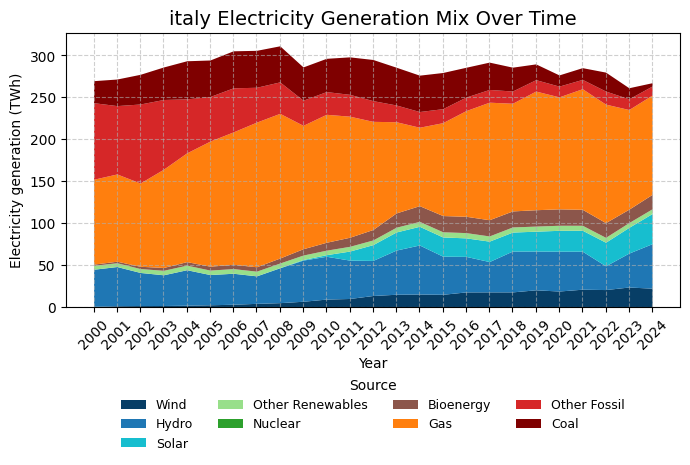

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

# --- Load & filter ---
df_all = pd.read_csv("yearly_full_release_long_format.csv")

df_italy = df_all[
    (df_all["Area"] == "Italy") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "TWh")
].copy()

# --- Aggregate & pivot ---
mix_italy = df_italy.groupby(["Year", "Variable"], as_index=False)["Value"].sum()

mix_pivot_italy = (
    mix_italy
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

# --- Desired order (clean → dirty) ---
energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

# Keep only existing columns & reorder
energy_order = [e for e in energy_order if e in mix_pivot_italy.columns]
mix_pivot_italy = mix_pivot_italy[energy_order]

# --- Color map ---
energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables":"#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_italy.columns]

# --- Plot ---
fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_italy.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("italy Electricity Generation Mix Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_italy.index)
ax.set_xticklabels(mix_pivot_italy.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order automatically
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

In [6]:
df_italy.to_csv("italy_electricity_generation_data.csv", index=False)